<a href="https://colab.research.google.com/github/LucasCastroPadilha/Predict_Startup/blob/main/PredStartup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1 dedinho de prosa.

Olá, tudo bem?

Nesse projeto vamos usar um dataset pequeno, porém redondinho. Vamos fazer uma análise exploratória e tentar fazer uma predição do lucro das Startups do dataset.

##IMPORTAÇÃO DE PACOTES E TRATAMENTO DOS DADOS



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy as np
#sns.set_style('darkgrid')
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27


In [2]:
df = pd.read_csv('/content/drive/MyDrive/50_startups/50_Startups.csv')

In [3]:
df['Total Spend'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']

In [4]:
df = df[['R&D Spend', 'Administration',	'Marketing Spend', 'Total Spend',	'State',	'Profit'	]]

Nessa primeira etapa do projeto, adicionei uma nova coluna com o gasto total de cada registro, assim como alterei a ordem das colunas.

##ANÁLISE EXPLORATÓRIA

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,Total Spend,State,Profit
0,165349.20,136897.80,471784.10,774031.10,New York,192261.83
1,162597.70,151377.59,443898.53,757873.82,California,191792.06
2,153441.51,101145.55,407934.54,662521.60,Florida,191050.39
3,144372.41,118671.85,383199.62,646243.88,New York,182901.99
4,142107.34,91391.77,366168.42,599667.53,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Total Spend      50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


Com o .info() temos muitas infomações relevantes para nossa análise:


*   Se temos valores Null.
*   Tipo de dados de cada coluna.
*   Quantidade de colunas e registros, assim como cada tipo encontrado.

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Total Spend,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,406091.353000,112012.639200
std,45902.256482,28017.802755,122290.310726,162419.010502,40306.180338
min,0.000000,51283.140000,0.000000,52285.200000,14681.400000
25%,39936.370000,103730.875000,129300.132500,293421.857500,90138.902500
50%,73051.080000,122699.795000,212716.240000,411888.640000,107978.190000
75%,101602.800000,144842.180000,299469.085000,516942.917500,139765.977500
max,165349.200000,182645.560000,471784.100000,774031.100000,192261.830000


In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Total Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.869663,0.972900
Administration,0.241955,1.000000,-0.032154,0.216674,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.952069,0.747766
Total Spend,0.869663,0.216674,0.952069,1.000000,0.872598
Profit,0.972900,0.200717,0.747766,0.872598,1.000000


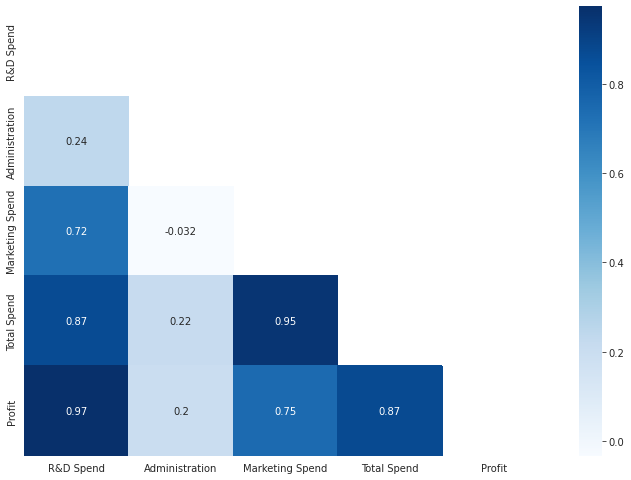

In [27]:
c = df.corr()
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(c, annot=True, cmap='Blues', mask=mask);
sns.set_style("white")

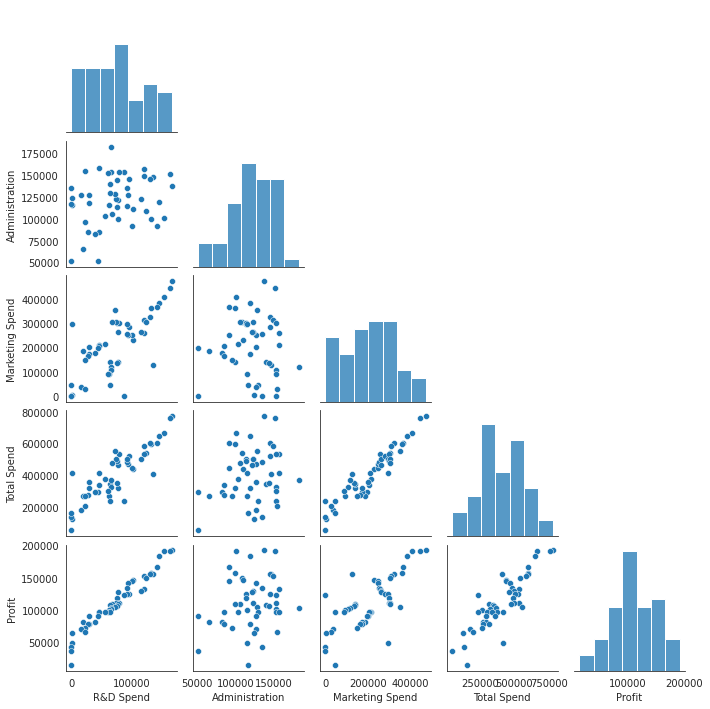

In [28]:
sns.pairplot(data=df, corner=True, height=2);

Com base na Descrição Estatística, Matriz de Correlação de Calor e no pairPlot do conjuto todo, podemos detectar certos padões lineares entre algumas variáveis.


Os gastos com marketing e pesquisa e desenvolvimento tem forte relação com o lucro da StartUp, tal como o gasto total da mesma.
Logo, o gasto total da empresa tem relação linear com o lucro.

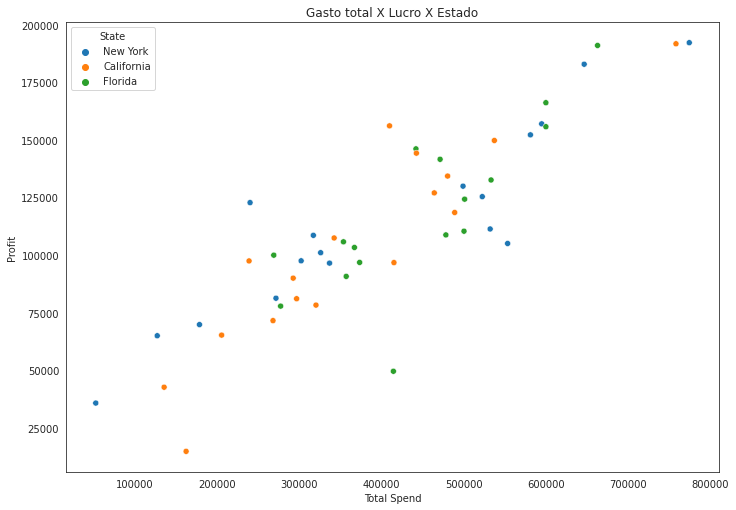

In [29]:
sns.scatterplot(x='Total Spend', y='Profit', hue='State', data=df);
sns.set_style('darkgrid')
plt.title('Gasto total X Lucro X Estado');

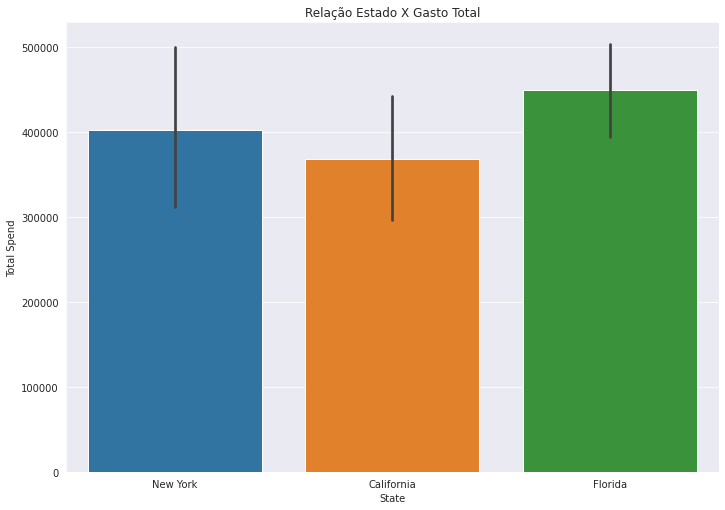

In [30]:
sns.barplot(x='State', y='Total Spend', data=df);
plt.title('Relação Estado X Gasto Total');

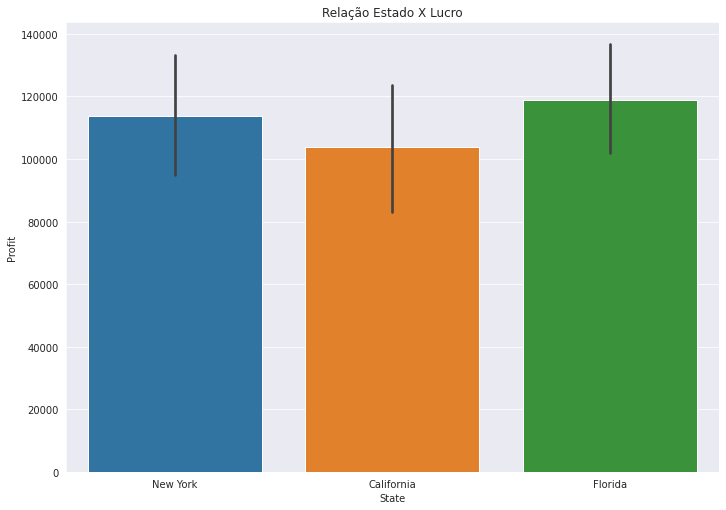

In [31]:
sns.barplot(x='State', y='Profit', data=df);
plt.title('Relação Estado X Lucro');

Nos graficos acima, exploramos a distribuição de lucro por estado.

Pode-se notar uma semelhança entre o lucro dos 3 estados listados, dando uma leve vantagem para Flórida.

O estado da Flórida também leva o podium no gasto total das StartUps.

##PRÉ-PROCESSAMENTO DE DADOS E MAQUINAS PREDITIVAS

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

Separando nossos dados de treino e teste.

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values


Transformando a coluna "State" em um dado numérico.

In [17]:
labelencoder = LabelEncoder()
X[:, 4] = labelencoder.fit_transform(X[:, 4])
X1  = pd.DataFrame(X)
X1.head()

,0,1,2,3,4
0,165349.2,136897.8,471784.1,774031.1,2
1,162597.7,151377.59,443898.53,757873.82,0
2,153441.51,101145.55,407934.54,662521.6,1
3,144372.41,118671.85,383199.62,646243.88,2
4,142107.34,91391.77,366168.42,599667.53,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=0)

Treinando nosso modelo e executando a predição com Regressão Linear.

In [19]:
modelo = LinearRegression()

modelo = modelo.fit(X_train, y_train)

y_predict = modelo.predict(X_test)



##Validações e comparações

In [20]:
print(r2_score(y_test, y_predict))

0.9355124411171476


Como visto acima, com base no r2 Score, tivemos um acerto de 93.55%, o que é muito bom.

In [21]:
df_comparativo = pd.DataFrame(data={'Predição':y_predict.flatten(), 'Valor atual':y_test.flatten()})
df_comparativo

,Predição,Valor atual
0,104054.591742,103282.38
1,132557.295553,144259.40
2,133632.591742,146121.95
3,72336.341742,77798.83
4,179657.591742,191050.39
5,114689.137932,105008.31
6,66514.637932,81229.06
7,98461.137932,97483.56
8,114294.341742,110352.25
9,169090.091742,166187.94


Acima temos os comparativos.

Em seguida utilizaremos a métrica de Erro Médio Absoluto na predição.

In [22]:
mae = mean_absolute_error(y_predict, y_test)
print('Erro Médio Absoluto é :', mae)

Erro Médio Absoluto é : 6503.5153757778135


Nossa predição termina com os seguintes resultados:

*   Acerto de 93.55% na Regressão.
*   Comparando nossos valores da predição e do teste, obtivemos pouca diferença, se levarmos em consideração a escala dos valores.  
*   Nossa Média de Erro Absoluto (mae), obteve um resultado muito bom, com $6.503,51 de erro para mais ou para menos.







#Finalizando

Quero agradecer por ter lido até aqui.

É muito importante ter sua atenção, já que sou noviço nesse mundo da Ciência de Dados.

Estou à disposição para dicas e críticas XD.